# ENV/ATM 415: Climate Laboratory

[Brian E. J. Rose](http://www.atmos.albany.edu/facstaff/brose/index.html), University at Albany

# Lecture 16: The one-dimensional Energy Balance Model

## Contents

1. [Heat transport and the energy budget for each latitude band](#section1)
2. [Parameterizing the radiation terms](#section2)
3. [Tuning the longwave parameters with reanalysis data](#section3)
4. [The one-dimensional diffusive energy balance model](#section4)
5. [The annual-mean EBM](#section5)
6. [Tuning the diffusivity](#section6)
7. [Summary: parameter values in the diffusive EBM](#section7)

____________
<a id='section1'></a>

## 1. Heat transport and the energy budget for each latitude band
____________

Way back at the beginning of the semester we wrote down a **global average energy budget** that looked like

$$ C \frac{dT}{dt} = \text{ASR} - \text{OLR} $$

Last time we talked about the additional **local heating** of each latitude band associated with atmospheric and oceanic motions:

$$ h = - \frac{1}{2 \pi a^2  \cos⁡\phi } \frac{\partial \mathcal{H}}{\partial \phi} $$

Using this, we can write down a **local energy budget** expressing how the temperature of each latitude band should change:

$$ C \frac{\partial T}{\partial t} = \text{ASR} - \text{OLR} - \frac{1}{2 \pi a^2  \cos⁡\phi } \frac{\partial \mathcal{H}}{\partial \phi}$$

Now the temperature $T$ is a function of latitude $\phi$ as well as time $t$ (so we write it as a partial derivative) 

We also introduced the **diffusive heat transport parameterization**

$$ \mathcal{H}(\phi) = -2 \pi ~a^2 \cos\phi D \frac{\partial T}{\partial \phi} $$

Putting this parameterization into the budget above gives

$$ C \frac{\partial T}{\partial t} = \text{ASR} - \text{OLR} + \frac{D}{\cos⁡\phi } \frac{\partial}{\partial \phi} \left( \cos\phi \frac{\partial T}{\partial \phi} \right)$$

(where we pulled the parameter $D$ out of the derivative because we are assuming it is a constant)

____________
<a id='section2'></a>

## 2. Parameterizing the radiation terms
____________

To turn our **budget** into a **model**, we need specific parameterizations that link the radiation ASR and OLR to surface temperature $T$ (the state variable for our model).

### Fixed albedo assumption

First, as usual, we can write the solar term as

$$ \text{ASR} = (1-\alpha) ~ Q $$

For now, we will **assume that the planetary albedo is fixed (does not depend on temperature)**. Therefore the entire shortwave term $(1-\alpha) Q$ is a fixed source term in our budget. It varies in space and time but does not depend on $T$.

Note that the solar term is (at least in annual average) larger at equator than poles… and transport term acts to flatten out the temperatures.

### Parameterizing the longwave radiation

Now, we almost have a model we can solve for $T$!  Just need a function OLR$(T)$ expressing the temperature dependence of the emission to space.

So…  what’s the link between OLR and temperature????

[ discuss ]

We spent a good chunk of the course looking at this question, and developed a model of a vertical column of air.

We are trying now to build a model of the equator-to-pole (or pole-to-pole) temperature structure.

We COULD use an array of column models, representing temperature as a function of height and latitude (and time).

But instead, we will keep things simple, one spatial dimension at a time.

Introduce the following **simple parameterization**:

$$ \text{OLR} = A + B T $$

With:

- $T$ the zonal average surface temperature in ºC
- $A$ is a constant in W m$^{-2}$
- $B$ is a constant in W m$^{-2}$ ºC$^{-1}$.

Think of $A$ as an inverse measure of the greenhouse gas amount (Why?).

The parameter $B$ is closely related to the **climate feedback parameter** $\lambda$ that we defined a while back. The only difference is that in the EBM we are going to explicitly separate the **albedo feedback** from all other radiative feedbacks.

____________
<a id='section3'></a>

## 3. Tuning the longwave parameters with reanalysis data
____________

### OLR versus surface temperature in NCEP Reanalysis data

Let's look at the data to find reasonable values for $A$ and $B$.

In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import xarray as xr
import climlab

In [2]:
ncep_url = "http://www.esrl.noaa.gov/psd/thredds/dodsC/Datasets/ncep.reanalysis.derived/"
ncep_air = xr.open_dataset( ncep_url + "pressure/air.mon.1981-2010.ltm.nc", decode_times=False)
ncep_Ts = xr.open_dataset( ncep_url + "surface_gauss/skt.sfc.mon.1981-2010.ltm.nc", decode_times=False)
lat_ncep = ncep_Ts.lat; lon_ncep = ncep_Ts.lon
print( ncep_Ts)

<xarray.Dataset>
Dimensions:             (lat: 94, lon: 192, nbnds: 2, time: 12)
Coordinates:
  * lon                 (lon) float32 0.0 1.875 3.75 5.625 7.5 9.375 11.25 ...
  * time                (time) float64 -6.571e+05 -6.57e+05 -6.57e+05 ...
  * lat                 (lat) float32 88.542 86.6531 84.7532 82.8508 80.9473 ...
Dimensions without coordinates: nbnds
Data variables:
    climatology_bounds  (time, nbnds) float64 ...
    skt                 (time, lat, lon) float64 ...
    valid_yr_count      (time, lat, lon) float64 ...
Attributes:
    title:                          4x daily NMC reanalysis
    description:                    Data is from NMC initialized reanalysis\n...
    platform:                       Model
    Conventions:                    COARDS
    not_missing_threshold_percent:  minimum 3% values input to have non-missi...
    history:                        Created 2011/07/12 by doMonthLTM\nConvert...
    References:                     http://www.esrl.noaa.gov/p

In [3]:
Ts_ncep_annual = ncep_Ts.skt.mean(dim=('lon','time'))

In [4]:
ncep_ulwrf = xr.open_dataset( ncep_url + "other_gauss/ulwrf.ntat.mon.1981-2010.ltm.nc", decode_times=False)
ncep_dswrf = xr.open_dataset( ncep_url + "other_gauss/dswrf.ntat.mon.1981-2010.ltm.nc", decode_times=False)
ncep_uswrf = xr.open_dataset( ncep_url + "other_gauss/uswrf.ntat.mon.1981-2010.ltm.nc", decode_times=False)
OLR_ncep_annual = ncep_ulwrf.ulwrf.mean(dim=('lon','time'))
ASR_ncep_annual = (ncep_dswrf.dswrf - ncep_uswrf.uswrf).mean(dim=('lon','time'))

In [5]:
from scipy.stats import linregress
slope, intercept, r_value, p_value, std_err = linregress(Ts_ncep_annual, OLR_ncep_annual)

print( 'Best fit is A = %0.0f W/m2 and B = %0.1f W/m2/degC' %(intercept, slope))

Best fit is A = 214 W/m2 and B = 1.6 W/m2/degC


We're going to plot the data and the best fit line, but also another line using these values:

In [6]:
#  More standard values
A = 210.
B = 2.

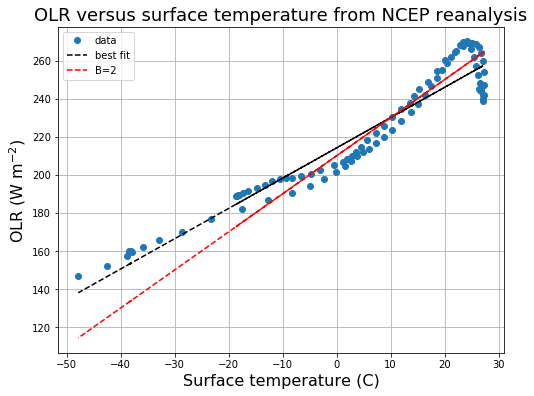

In [7]:
fig, ax1 = plt.subplots(figsize=(8,6))
ax1.plot( Ts_ncep_annual, OLR_ncep_annual, 'o' , label='data')
ax1.plot( Ts_ncep_annual, intercept + slope * Ts_ncep_annual, 'k--', label='best fit')
ax1.plot( Ts_ncep_annual, A + B * Ts_ncep_annual, 'r--', label='B=2')
ax1.set_xlabel('Surface temperature (C)', fontsize=16)
ax1.set_ylabel('OLR (W m$^{-2}$)', fontsize=16)
ax1.set_title('OLR versus surface temperature from NCEP reanalysis', fontsize=18)
ax1.legend(loc='upper left')
ax1.grid()

Discuss these curves...

Suggestion of at least 3 different regimes with different slopes (cold, medium, warm).

Unbiased "best fit" is actually a poor fit over all the intermediate temperatures.

The astute reader will note that...   by taking the zonal average of the data before the regression, we are biasing this estimate toward cold temperatures.  [WHY?]



Let's take these reference values:

$$ A = 210 ~ \text{W m}^{-2}, ~~~ B = 2 ~ \text{W m}^{-2}~^\circ\text{C}^{-1} $$

Note that in the **global average**, recall $\overline{T_s} = 288 \text{ K} = 15^\circ\text{C}$

And so this parameterization gives 

$$ \overline{\text{OLR}} = 210 + 15 \times 2 = 240 ~\text{W m}^{-2} $$

And the observed global mean is $\overline{\text{OLR}} = 239 ~\text{W m}^{-2} $
So this is consistent.




### Relationship between $B$ and feedback parameters

Recall that when we looked at climate forcing and feedback, we said that overall response to a forcing $\Delta R$ in W m$^{-2}$ is

$$ \Delta T = \frac{\Delta R}{\lambda} $$

and where $\lambda$ is the overall **climate feedback parameter**:

$$\lambda = \lambda_0 - \sum_{i=1}^{N} \lambda_i $$

and

- $\lambda_0 = 3.3$ W m$^{-2}$ K$^{-1}$ is the no-feedback climate response
- $\sum_{i=1}^{N} \lambda_i$ is the sum of all radiative feedbacks, defined to be **positive** for **amplifying processes**.

More positive feedbacks thus mean that $\lambda$ is a smaller number, which means the response to a given forcing is larger!

Here in the EBM the parameter $B$ plays the same role as $\lambda$ -- a smaller number means a more sensitive model.

Our estimate $B = 2 ~ \text{W m}^{-2}~^\circ\text{C}^{-1}$ thus implies that the sum of all LW feedback processes (including water vapor, lapse rates and clouds) is

$$ \sum_{i=1}^{N} \lambda_i = 3.3 ~\text{W m}^{-2}~^\circ\text{C}^{-1} - 2 ~\text{W m}^{-2}~^\circ\text{C}^{-1} = 1.3 ~\text{W m}^{-2}~^\circ\text{C}^{-1} $$ 

Looking back at the chart of feedback parameter values from GCMs, does this seem plausible?

____________
<a id='section4'></a>

## 4. The one-dimensional diffusive energy balance model
____________



Putting the above OLR parameterization into our budget equation gives

$$ C \frac{\partial T}{\partial t} = (1-\alpha) ~ Q - \left( A + B~T \right) + \frac{D}{\cos⁡\phi } \frac{\partial }{\partial \phi} \left(   \cos⁡\phi  ~ \frac{\partial T}{\partial \phi} \right) $$

This is the equation for a very important and useful simple model of the climate system. It is typically referred to as the (one-dimensional) Energy Balance Model.

(although as we have seen over and over, EVERY climate model is actually an “energy balance model” of some kind)

Also for historical reasons this is often called the **Budyko-Sellers model**, after Budyko and Sellers who both (independently of each other) published influential papers on this subject in 1969.

Recap: parameters in this model are

- C: heat capacity in J m$^{-2}$ ºC$^{-1}$
- A: longwave emission at 0ºC in W m$^{-2}$
- B: increase in emission per degree, in W m$^{-2}$ ºC$^{-1}$
- D: horizontal (north-south) diffusivity of the climate system in W m$^{-2}$ ºC$^{-1}$

We also need to specify the albedo.

### Tune albedo formula to match observations

Let's go back to the NCEP Reanalysis data to see how planetary albedo actually varies as a function of latitude.

In [8]:
days = np.linspace(1.,50.)/50 * climlab.constants.days_per_year
Qann_ncep = np.mean( climlab.solar.insolation.daily_insolation(lat_ncep, days ),axis=1)
albedo_ncep = 1 - ASR_ncep_annual / Qann_ncep

albedo_ncep_global = np.average(albedo_ncep, weights=np.cos(np.deg2rad(lat_ncep)))

The annual, global mean planetary albedo is 0.354


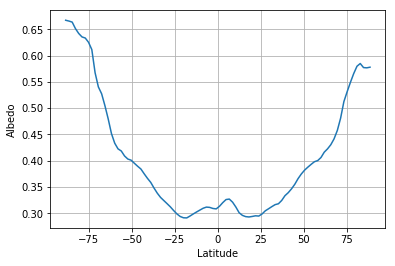

In [9]:
print( 'The annual, global mean planetary albedo is %0.3f' %albedo_ncep_global)
fig,ax = plt.subplots()
ax.plot(lat_ncep, albedo_ncep)
ax.grid();
ax.set_xlabel('Latitude')
ax.set_ylabel('Albedo')

**The albedo increases markedly toward the poles.**

There are several reasons for this:

- surface snow and ice increase toward the poles
- Cloudiness is an important (but complicated) factor.
- Albedo increases with solar zenith angle (the angle at which the direct solar beam strikes a surface)

#### Approximating the observed albedo

The albedo curve can be approximated by a smooth function that increases with latitude:

$$ \alpha(\phi) \approx \alpha_0 + \alpha_2 P_2(\sin\phi) $$

where $P_2$ is a function called the 2nd Legendre polynomial. Don't worry about exactly what this means. This is what it looks like:

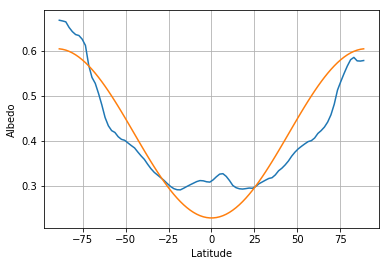

In [10]:
# Add a new curve to the previous figure
a0 = albedo_ncep_global
a2 = 0.25
ax.plot(lat_ncep, a0 + a2 * climlab.utils.legendre.P2(np.sin(np.deg2rad(lat_ncep))))
fig

Of course we are not fitting all the details of the observed albedo curve. But we do get the correct global mean a reasonable representation of the equator-to-pole gradient in albedo.

____________
<a id='section5'></a>

## 5. The annual-mean EBM
____________

For now, we will be focusing on the **annual mean** model. 

For the insolation, we set $Q(\phi,t) = \bar{Q}(\phi)$, the annual mean value (large at equator, small at pole).

### Animating the adjustment of annual mean EBM to equilibrium

Before looking at the details of how to set up an EBM in `climlab`, let's look at an animation of the adjustment of the model (its temperature and energy budget) from an isothermal initial condition.

For reference, all the code necessary to generate the animation is here in the notebook.

In [11]:
#  Some imports needed to make and display animations
from IPython.display import HTML
from matplotlib import animation

def setup_figure():
    templimits = -20,32
    radlimits = -340, 340
    htlimits = -6,6
    latlimits = -90,90
    lat_ticks = np.arange(-90,90,30)

    fig, axes = plt.subplots(3,1,figsize=(8,10))
    axes[0].set_ylabel('Temperature (deg C)')
    axes[0].set_ylim(templimits)
    axes[1].set_ylabel('Energy budget (W m$^{-2}$)')
    axes[1].set_ylim(radlimits)
    axes[2].set_ylabel('Heat transport (PW)')
    axes[2].set_ylim(htlimits)
    axes[2].set_xlabel('Latitude')
    for ax in axes: ax.set_xlim(latlimits); ax.set_xticks(lat_ticks); ax.grid()
    fig.suptitle('Diffusive energy balance model with annual-mean insolation', fontsize=14)
    return fig, axes

def initial_figure(model):
    #  Make figure and axes
    fig, axes = setup_figure()
    # plot initial data
    lines = []
    lines.append(axes[0].plot(model.lat, model.Ts)[0])
    lines.append(axes[1].plot(model.lat, model.ASR, 'k--', label='SW')[0])
    lines.append(axes[1].plot(model.lat, -model.OLR, 'r--', label='LW')[0])
    lines.append(axes[1].plot(model.lat, model.net_radiation, 'c-', label='net rad')[0])
    lines.append(axes[1].plot(model.lat, model.heat_transport_convergence(), 'g--', label='dyn')[0])
    lines.append(axes[1].plot(model.lat, 
        np.squeeze(model.net_radiation)+model.heat_transport_convergence(), 'b-', label='total')[0])
    axes[1].legend(loc='upper right')
    lines.append(axes[2].plot(model.lat_bounds, model.diffusive_heat_transport())[0])
    lines.append(axes[0].text(60, 25, 'Day 0'))
    return fig, axes, lines

def animate(day, model, lines):
    model.step_forward()
    #  The rest of this is just updating the plot
    lines[0].set_ydata(model.Ts)
    lines[1].set_ydata(model.ASR)
    lines[2].set_ydata(-model.OLR)
    lines[3].set_ydata(model.net_radiation)
    lines[4].set_ydata(model.heat_transport_convergence())
    lines[5].set_ydata(np.squeeze(model.net_radiation)+model.heat_transport_convergence())
    lines[6].set_ydata(model.diffusive_heat_transport())
    lines[-1].set_text('Day {}'.format(int(model.time['days_elapsed'])))
    return lines   

In [12]:
#  A model starting from isothermal initial conditions
e = climlab.EBM_annual()
e.Ts[:] = 15.  # in degrees Celsius
e.compute_diagnostics()

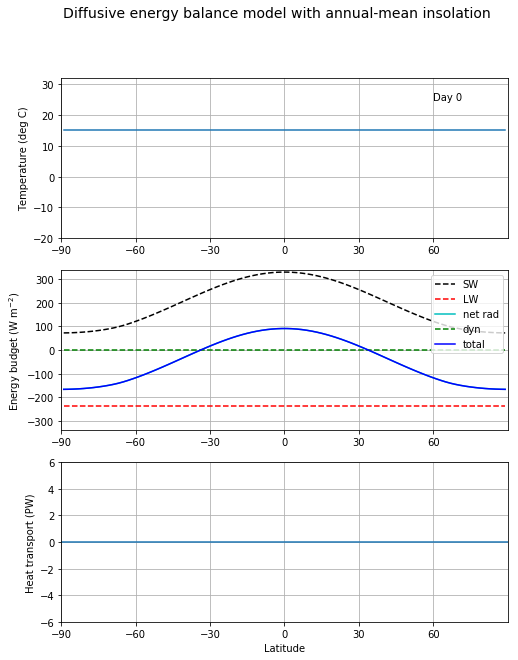

In [13]:
#  Plot initial data
fig, axes, lines = initial_figure(e)

In [14]:
ani = animation.FuncAnimation(fig, animate, frames=np.arange(1, 100), fargs=(e, lines))

In [15]:
HTML(ani.to_html5_video())

____________
<a id='section6'></a>

## 6. Tuning the diffusivity
____________

We want to choose a value of $D$ that gives a reasonable approximation to observations:

- $\Delta T \approx 45$ ºC between equator and pole
- $\mathcal{H}_{max} \approx 5.5$ PW (peak heat transport)

In [16]:
ebm = climlab.EBM_annual(num_lat=40, A=210, B=2, a0=0.354, a2=0.25, D=1.)
print(ebm)

climlab Process of type <class 'climlab.model.ebm.EBM_annual'>. 
State variables and domain shapes: 
  Ts: (40, 1) 
The subprocess tree: 
Untitled: <class 'climlab.model.ebm.EBM_annual'>
   LW: <class 'climlab.radiation.aplusbt.AplusBT'>
   insolation: <class 'climlab.radiation.insolation.AnnualMeanInsolation'>
   albedo: <class 'climlab.surface.albedo.P2Albedo'>
   diffusion: <class 'climlab.dynamics.diffusion.MeridionalDiffusion'>



In [17]:
ebm.integrate_years(20.)

Integrating for 1800 steps, 7304.844000000001 days, or 20.0 years.
Total elapsed time is 19.99999999999943 years.


In [18]:
ebm.Ts

Field([[-12.26380533],
       [-11.90335191],
       [-11.18600118],
       [-10.11933409],
       [ -8.71602774],
       [ -6.99587506],
       [ -4.99120883],
       [ -2.7496105 ],
       [ -0.32575346],
       [  2.22075802],
       [  4.82660239],
       [  7.4259771 ],
       [  9.95205275],
       [ 12.33865448],
       [ 14.52211192],
       [ 16.44318978],
       [ 18.04899789],
       [ 19.29477742],
       [ 20.14546523],
       [ 20.57694989],
       [ 20.57694989],
       [ 20.14546524],
       [ 19.29477743],
       [ 18.04899791],
       [ 16.44318981],
       [ 14.52211196],
       [ 12.33865452],
       [  9.9520528 ],
       [  7.42597714],
       [  4.82660244],
       [  2.22075807],
       [ -0.3257534 ],
       [ -2.74961044],
       [ -4.99120876],
       [ -6.995875  ],
       [ -8.71602768],
       [-10.11933402],
       [-11.18600112],
       [-11.90335184],
       [-12.26380526]])

In [19]:
deltaT = np.max(ebm.Ts) - np.min(ebm.Ts)
print(deltaT)

32.84075522594021


In [20]:
#. The heat transport in PW
ebm.heat_transport()

array([ -0.00000000e+00,  -9.18904284e-02,  -3.64621108e-01,
        -8.09080950e-01,  -1.40900546e+00,  -2.13887046e+00,
        -2.95710444e+00,  -3.80557880e+00,  -4.62917406e+00,
        -5.37363147e+00,  -5.98702816e+00,  -6.42232424e+00,
        -6.64021012e+00,  -6.61185866e+00,  -6.32125688e+00,
        -5.76684312e+00,  -4.96224035e+00,  -3.93595867e+00,
        -2.73003339e+00,  -1.39766258e+00,  -1.04149739e-08,
         1.39766256e+00,   2.73003337e+00,   3.93595865e+00,
         4.96224033e+00,   5.76684310e+00,   6.32125687e+00,
         6.61185864e+00,   6.64021011e+00,   6.42232423e+00,
         5.98702816e+00,   5.37363146e+00,   4.62917406e+00,
         3.80557879e+00,   2.95710444e+00,   2.13887046e+00,
         1.40900546e+00,   8.09080950e-01,   3.64621108e-01,
         9.18904284e-02,  -0.00000000e+00])

In [21]:
# what's the peak value?
np.max(ebm.heat_transport())

6.6402101078967117

### Class exercise

Repeat these calculations with some different values of $D$. We'll crowd-source the optimal value that best matches our observational targets.

### Results

12 students calculated $\Delta T$ and $\mathcal{H}_{max}$ for different values of the diffusivity parameter $D$. 

We collected the data on the whiteboard during class:

![column sketch](http://www.atmos.albany.edu/facstaff/brose/classes/ENV415_Spring2018/images/classdata.jpg)

Here are the same data entered into a [Pandas data frame](http://pandas.pydata.org/pandas-docs/stable/10min.html).

In [22]:
import pandas as pd
classdata = pd.DataFrame({'$D$': [1., 0.5, 0.638, 0.55, 0.58, 0.6, 0.57, 0.63, 12.0, 0.423, 0.45, 0., 0.63], 
                          '$\Delta T$': [33., 52., 45.007, 49.46, 47.85, 46.8, 48.37, 45.85, 3.56, 57.686, 55.716, 126.124, 48.37],
                          '$\mathcal{H}_{max}$': [6.6, 5.3, 5.8, 5.5, 5.6, 5.7, 5.59, 5.76, 8.60, 4.96, 5.095, 0., 5.76],
                         })
classdata

,$D$,$\Delta T$,$\mathcal{H}_{max}$
0,1.000,33.000,6.600
1,0.500,52.000,5.300
2,0.638,45.007,5.800
3,0.550,49.460,5.500
4,0.580,47.850,5.600
5,0.600,46.800,5.700
6,0.570,48.370,5.590
7,0.630,45.850,5.760
8,12.000,3.560,8.600
9,0.423,57.686,4.960


Now we can do fun things like make a scatterplot of the data:

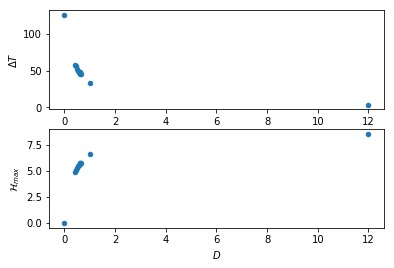

In [23]:
fig, axes = plt.subplots(2,1)
classdata.plot.scatter(x='$D$', y='$\Delta T$', ax=axes[0])
classdata.plot.scatter(x='$D$', y='$\mathcal{H}_{max}$', ax=axes[1])

Evidently the temperature gradient $\Delta T$ decreases with $D$, while the heat transport increases with $D$.

## A more systematic search

In [24]:
Darray = np.arange(0., 2.05, 0.05)

model_list = []
Tmean_list = []
deltaT_list = []
Hmax_list = []

for D in Darray:
    ebm = climlab.EBM_annual(A=210, B=2, a0=0.354, a2=0.25, D=D)
    ebm.integrate_years(20., verbose=False)
    Tmean = ebm.global_mean_temperature()
    deltaT = np.max(ebm.Ts) - np.min(ebm.Ts)
    energy_in = np.squeeze(ebm.ASR - ebm.OLR)
    Htrans = ebm.heat_transport()
    Hmax = np.max(Htrans)
    model_list.append(ebm)
    Tmean_list.append(Tmean)
    deltaT_list.append(deltaT)
    Hmax_list.append(Hmax)

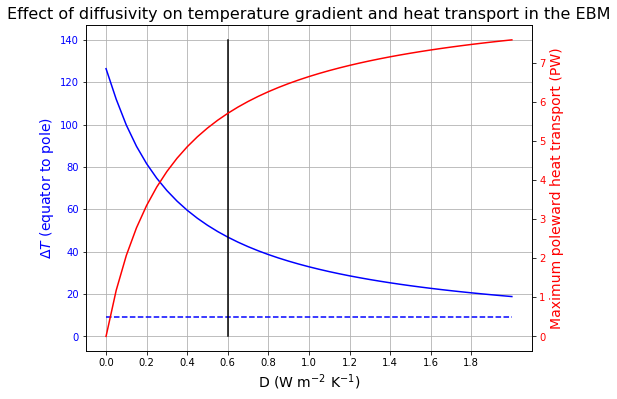

In [25]:
color1 = 'b'
color2 = 'r'

fig = plt.figure(figsize=(8,6))
ax1 = fig.add_subplot(111)
ax1.plot(Darray, deltaT_list, color=color1)
ax1.plot(Darray, Tmean_list, 'b--')
ax1.set_xlabel('D (W m$^{-2}$ K$^{-1}$)', fontsize=14)
ax1.set_xticks(np.arange(Darray[0], Darray[-1], 0.2))
ax1.set_ylabel('$\Delta T$ (equator to pole)', fontsize=14,  color=color1)
for tl in ax1.get_yticklabels():
    tl.set_color(color1)
ax2 = ax1.twinx()
ax2.plot(Darray, Hmax_list, color=color2)
ax2.set_ylabel('Maximum poleward heat transport (PW)', fontsize=14, color=color2)
for tl in ax2.get_yticklabels():
    tl.set_color(color2)
ax1.set_title('Effect of diffusivity on temperature gradient and heat transport in the EBM', fontsize=16)
ax1.grid()

ax1.plot([0.6, 0.6], [0, 140], 'k-')

When $D=0$, every latitude is in radiative equilibrium and the heat transport is zero. As we have already seen, this gives an equator-to-pole temperature gradient much too high.

When $D$ is **large**, the model is very efficient at moving heat poleward. The heat transport is large and the temperture gradient is weak.

The real climate seems to lie in a sweet spot in between these limits.

It looks like our fitting criteria are met reasonably well with $D=0.6$ W m$^{-2}$ K$^{-1}$

Also, note that the **global mean temperature** (plotted in dashed blue) is completely insensitive to $D$. Why do you think this is so?

____________
<a id='section7'></a>

## 7. Summary: parameter values in the diffusive EBM
____________

Our model is defined by the following equation

$$ C \frac{\partial T}{\partial t} = (1-\alpha) ~ Q - \left( A + B~T \right) + \frac{D}{\cos⁡\phi } \frac{\partial }{\partial \phi} \left(   \cos⁡\phi  ~ \frac{\partial T}{\partial \phi} \right) $$

with the albedo given by

$$ \alpha(\phi) = \alpha_0 + \alpha_2 P_2(\sin\phi) $$

We have chosen the following parameter values, which seems to give a reasonable fit to the observed **annual mean temperature and energy budget**:

- $ A = 210 ~ \text{W m}^{-2}$
- $ B = 2 ~ \text{W m}^{-2}~^\circ\text{C}^{-1} $
- $ a_0 = 0.354$
- $ a_2 = 0.25$
- $ D = 0.6 ~ \text{W m}^{-2}~^\circ\text{C}^{-1} $